In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
df = pd.read_csv('datasets/vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


## Розмір датасету
- Кількість рекордів - 846
- Кількість ознак - 19

In [7]:
df.shape

(846, 19)

- Можемо побачити, що в нас є порожні значення в датасеті

In [8]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Розподіл ознак є нерівномірним, оскільки діапазони значень, середні значення та стандартні відхилення суттєво відрізняються між ознаками.
Це вказує на різний масштаб та потенційну наявність аномальних значень, що потребує стандартизації перед моделюванням.

In [62]:
col = df.columns[df.isnull().any()]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


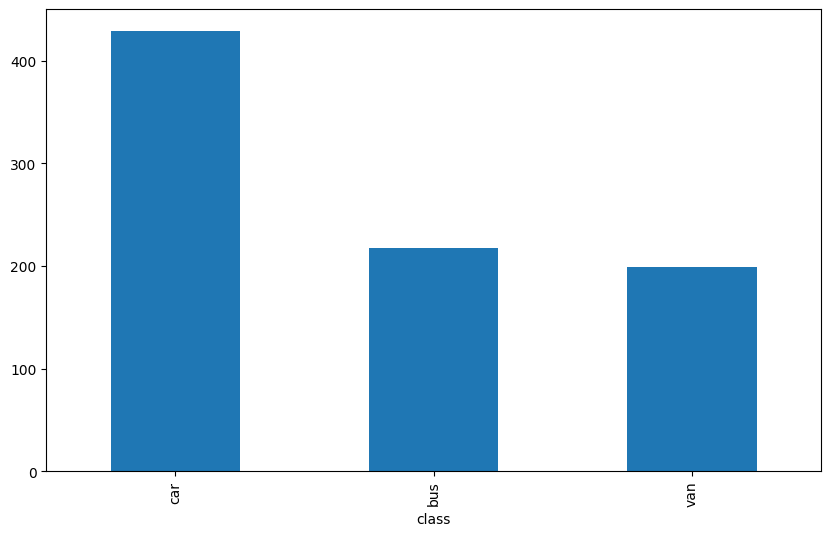

In [10]:
class_counts = df['class'].value_counts()

# Plot the counts as a bar plot
class_counts.plot(kind='bar', figsize=(10, 6))
plt.show()

## Correlation
- Із хітмапи видно, що в датасеті присутні численні мультиколінеарні ознаки.
- Висококорельовані ознаки несуть подібну інформацію для моделі
- ому такі ознаки можна вилучити без суттєвої втрати інформації.

In [92]:
# class_labels = df['class'].copy()
# df['class'] = df['class'].astype('category').cat.codes
df['class_codes'] = df['class'].astype('category').cat.codes
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_codes
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van,2
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car,1


<Axes: >

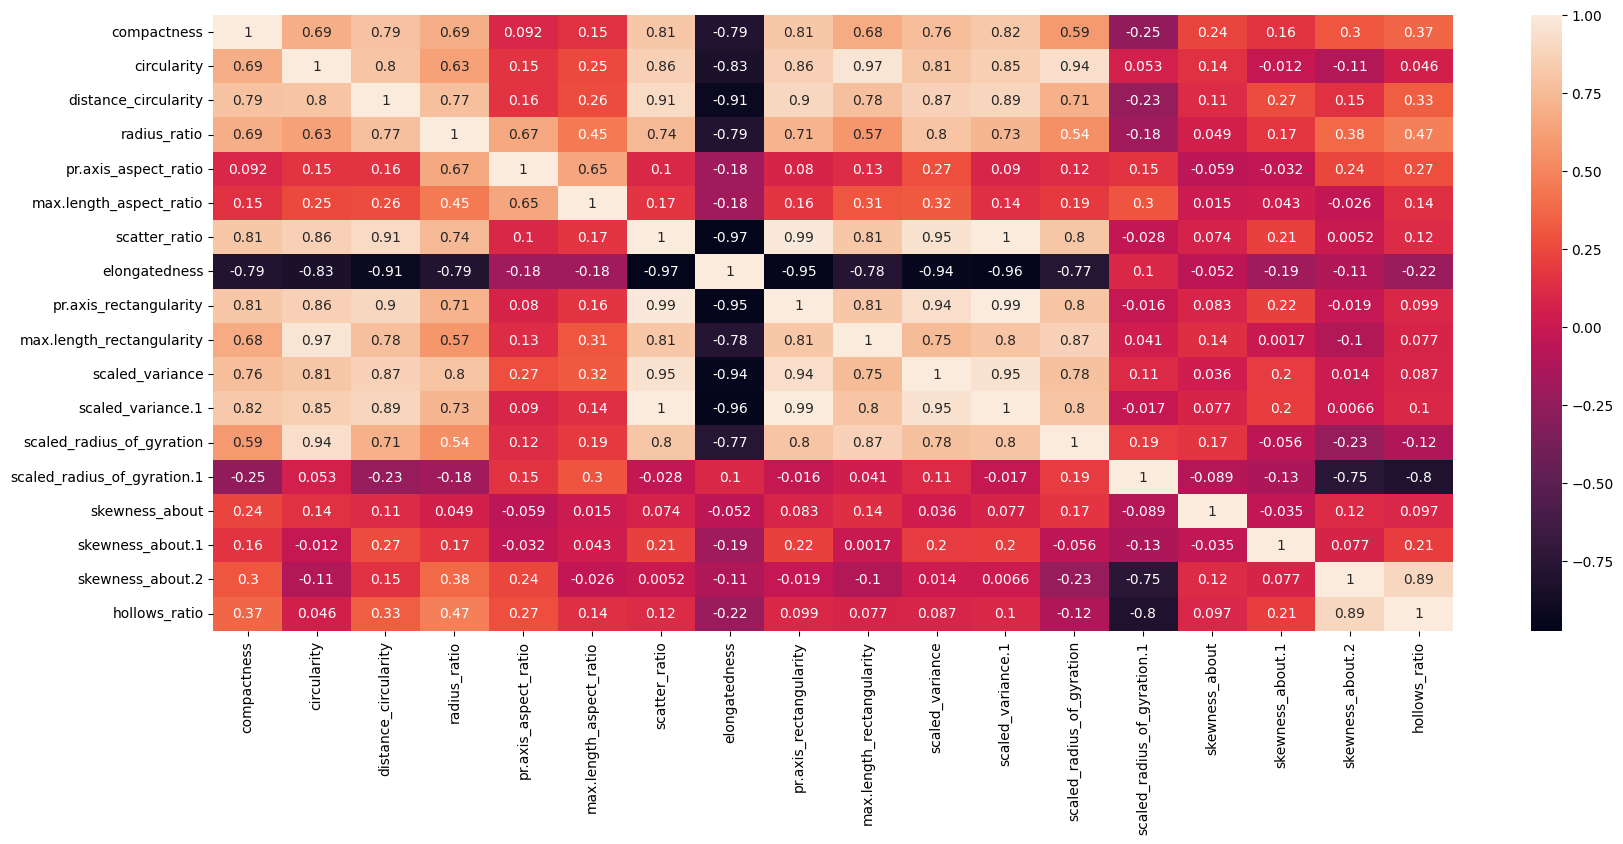

In [94]:
fig, ax = plt.subplots(figsize = [20, 8])
corr = df.drop(columns=["class", "class_codes"]).corr() #Finding correlation of all the features
sns.heatmap(corr, annot = True)

In [95]:
corr.abs()
corr_pos = corr.abs()
mask = corr_pos < 0.8 # створимо маску, по масці відфільтруємо всі кореляції менше 0.8


<Axes: >

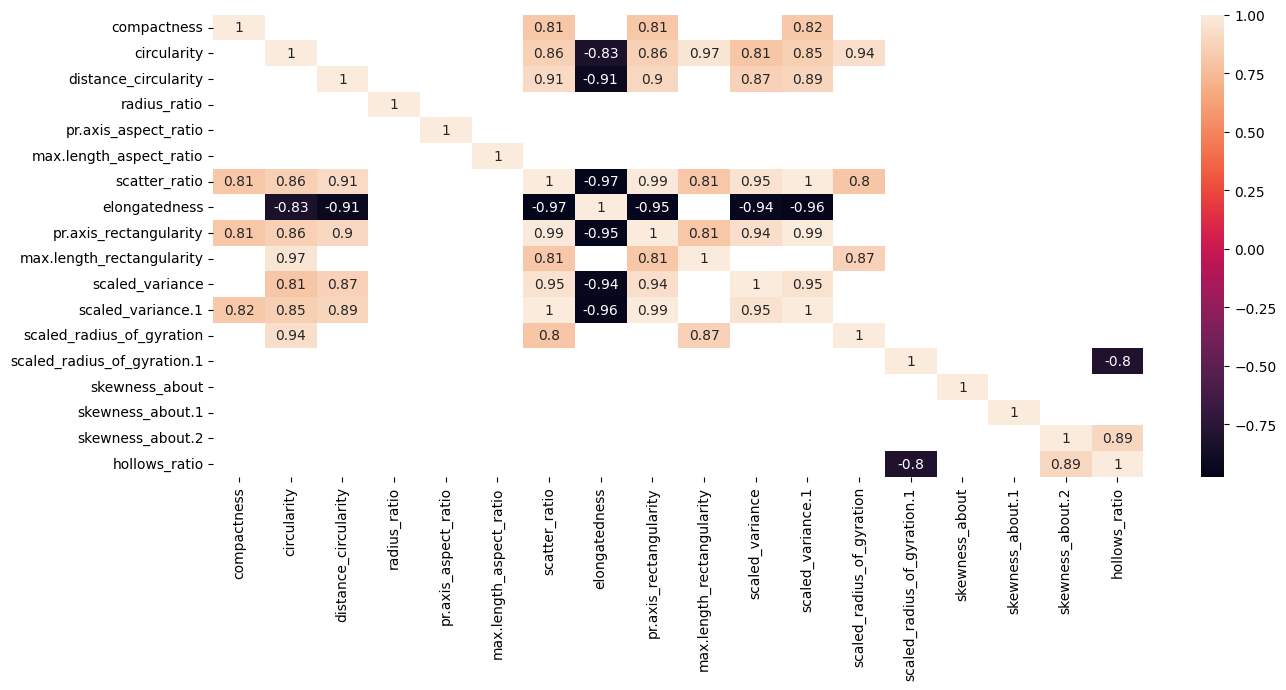

In [96]:
fig, ax = plt.subplots(figsize = [15, 6])
sns.heatmap(corr, annot = True, mask = mask)

- Тепер ми бачемо, що фічі compactness, circularity, distance_circularity,elongatedness, pr.axis_rectangularity, max.length_rectangularity,scaled_variance, scaled_variance.1, scaled_radius_of_gyration високо корельовані до scatter_ratio. Тож scatter_ratio буде репрезентувати ці фічі.
- Аналогічно hollows_ratio репрезентує фічі scaled_radius_of_gyration.1, skewness_about.2

In [97]:
selected_columns = [
    'radius_ratio',
    'pr.axis_aspect_ratio',
    'max.length_aspect_ratio',
    'scatter_ratio',
    'skewness_about',
    'skewness_about.1',
    'hollows_ratio'
]

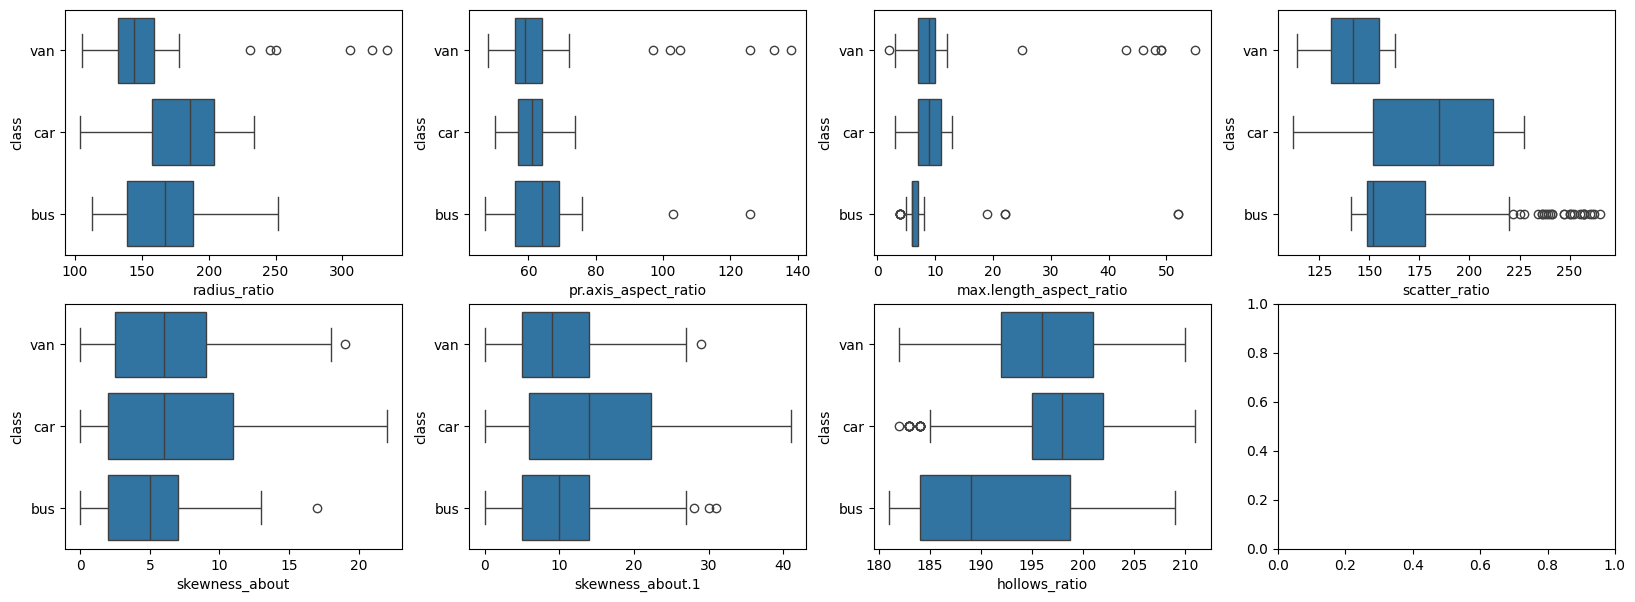

In [99]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = [20, 7])

for col, axes in zip(selected_columns, ax.flatten()):
  sns.boxplot(x = col, y = 'class', data = df.drop(columns=["class_codes"]), ax = axes)

- Ці графіки дають змогу оцінити важливість кожної ознаки окремо для прогнозування цільової змінної
- Ознака, яка демонструє вищу варіативність між класами на графіку boxplot, матиме більший внесок у процес прогнозування

## Далі маємо наступні дії
- Ми вже обрали ознаки використовуючи матрицю кореляцій
- Нам потрібно заповнити пропущені значення використорвуючи медіани
- Потрібно усунути аномальні значення. Їх наявність чітко видно на boxplot-графіках(будемо використовувати [1.5*IQR](https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414))

In [100]:
def outlier_removal(ar):
  for i in range(ar.shape[1]):
    p = np.percentile(ar[:, i], [25, 75]) # вириховуємо 25 та 75 відсоткові процентилі
    iqr = p[1] - p[0] # рахуємо iqr
    q1 = p[0]- 1.5*iqr # шукаємо lower bound
    q3 = p[1]+ 1.5*iqr # шукаємо upper bound
    ar[:, i][ar[:, i]<q1] = q1 # робимо заміну
    ar[:, i][ar[:, i]>q3] = q3 # робимо заміну
  return ar

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [102]:
preprocessor = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('outlier', FunctionTransformer(outlier_removal)),
    ('scale', StandardScaler()),
])

In [103]:
from algorithms import one_r, decision_tree, knn, naive_bayes

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import OneRClassifier

classifiers = {
    'Naive Bayes': GaussianNB(),
    'Naive Bayes Custom': naive_bayes.NaiveBayesClassifierCustom(),
    'One Rule': OneRClassifier(),
    'One Rule Custom': one_r.OneRClassifierCustom(),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Decision Tree Custom': decision_tree.DecisionTreeClassifierCustom(),
    'kNN': KNeighborsClassifier(),
    'kNN Custom': knn.KNNClassifierCustom(),
}

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def test_classifiers(preprocessor_pipeline, x, y, test_size, seed):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=test_size, random_state = seed)
    results = []

    for name, clf in classifiers.items():
        pipeline_clf = Pipeline([
            ('preprocess', preprocessor_pipeline),
            ('classifier', clf)
        ])
        
        pipeline_clf.fit(x_train, y_train)
        
        y_pred = pipeline_clf.predict(x_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        results.append({
            'Classifier': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })
    
    return results

In [106]:
x = df[selected_columns]
y = df['class_codes']
pd.DataFrame(test_classifiers(preprocessor, x, y, 0.3, 3))

/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an 

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.700787,0.717627,0.691205,0.682640
1,Naive Bayes Custom,0.688976,0.671182,0.687666,0.676729
2,One Rule,0.582677,0.563343,0.578454,0.565615
3,One Rule Custom,0.566929,0.543278,0.555397,0.545018
4,Decision Tree,0.862205,0.869794,0.852286,0.859904
5,Decision Tree Custom,0.602362,0.574073,0.579080,0.573076
6,kNN,0.870079,0.859182,0.857861,0.857018
7,kNN Custom,0.870079,0.855300,0.860833,0.857548


#### Спробуємо піти далі й доопрацювати датасет :)
Спробуємо використати PCA для того, щоб зробити ознаки незалежними

In [107]:
from sklearn.decomposition import PCA
seed = 3
preprocessor_pca = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('outlier', FunctionTransformer(outlier_removal)),
    ('pca', PCA(random_state = seed)),
    ('scale', StandardScaler()),
])

In [108]:
x_pca_all = df.drop(['class', 'class_codes'], axis = 1)
y_pca_all = df['class_codes']
pd.DataFrame(test_classifiers(preprocessor_pca, x_pca_all, y_pca_all, 0.3, seed))

/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/mlxtend/classifier/oner.py:89: UserWarning: Feature array likely contains at least one non-categorical column. Column 0 appears to have a unique value in every row.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Prog

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.917323,0.906103,0.922838,0.911327
1,Naive Bayes Custom,0.236220,0.078740,0.333333,0.127389
2,One Rule,0.255906,0.085302,0.333333,0.135841
3,One Rule Custom,0.507874,0.169291,0.333333,0.224543
4,Decision Tree,0.905512,0.896895,0.901491,0.899137
5,Decision Tree Custom,0.507874,0.169291,0.333333,0.224543
6,kNN,0.960630,0.956621,0.959302,0.957295
7,kNN Custom,0.960630,0.957636,0.959302,0.958209


In [109]:
x_pca_reduced = df[selected_columns]
y_pca_reduced = df['class_codes']
pd.DataFrame(test_classifiers(preprocessor_pca, x_pca_reduced, y_pca_reduced, 0.3, seed))

/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/mlxtend/classifier/oner.py:89: UserWarning: Feature array likely contains at least one non-categorical column. Column 0 appears to have a unique value in every row.
  warnings.warn(
/home/illia/Programming/Univ/data_mining/data_mining_laba_1/venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/illia/Prog

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.830709,0.810295,0.820155,0.813716
1,Naive Bayes Custom,0.236220,0.078740,0.333333,0.127389
2,One Rule,0.255906,0.085302,0.333333,0.135841
3,One Rule Custom,0.507874,0.169291,0.333333,0.224543
4,Decision Tree,0.909449,0.908730,0.900676,0.904302
5,Decision Tree Custom,0.507874,0.169291,0.333333,0.224543
6,kNN,0.901575,0.896607,0.898907,0.897734
7,kNN Custom,0.897638,0.888627,0.899722,0.893594
